In [1]:
# Load required libraries
from sklearn import tree
import sklearn.tree
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics 
import math
import random
from sklearn.neighbors import KNeighborsClassifier
import time
from time import process_time
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score

# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [2]:
#Read files
t_size= 8
p_size= 8

#Read files
refdata= pd.read_csv("./Final dataset_3/features.txt", header=None) #92 features
df= pd.read_csv(f"./Final dataset_3/dataset_norm_t{t_size}_p{p_size}.csv", index_col= None)
type(df)
# print(df.shape)
df.describe().transpose()

# Creating array
remove_column= ['HR_spectral_entropy', 'EDA_skew', 'ST_spectral_variation', 'ECG_power_bandwidth', 'ST_var',
                'HR_app_entropy', 'ECG_spectral_variation', 'EDA_avg_phase', 'EDA_fundamental_frequency', 'EDA_spectral_kurtosis',
                'EDA_kurtosis', 'HR_max_power_spectrum', 'ECG_var', 'ECG_total_energy', 'ST_max_power_spectrum',
                'HR_power_bandwidth', 'ST_spectral_skewness', 'ST_spectral_entropy', 'EDA_min', 'EDA_maxslope',
                'ST_spectral_kurtosis', 'HR_skew', 'EDA_avg_magnitude', 'EDA_spectral_distance', 'EDA_std',
                'ST_power_bandwidth', 'EDA_max', 'ST_app_entropy', 'ST_skew', 'HR_var',
                'EDA_total_energy', 'EDA_var', 'EDA_auc', 'EDA_mean', 'ST_kurtosis',
                'ECG_spectral_kurtosis', 'ECG_spectral_skewness', 'ECG_auc', 'ECG_mean', 'EDA_median',
                'ST_avg_phase', 'ECG_avg_phase', 'ECG_max_power_spectrum', 'ST_fundamental_frequency',
                'HR_spectral_variation', 'HR_kurtosis', 'ECG_max_frequency']

target_column= ['label']

# predictors= list(set(list(df.columns))-set(target_column))
predictors= list(set(list(df.columns))-set(target_column)-set(remove_column))
X=df[predictors].values
y= df[target_column].values

#Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify= y, random_state=10)

# print(X_train.shape); print(X_test.shape)
# print(y_train.shape); print(y_test.shape)

print(X.shape); print(X)
print(y.shape); print(y)

(6437, 45)
[[0.03189655 0.37083267 0.3708271  ... 0.18110236 0.98308668 0.0560345 ]
 [0.03448276 0.37025413 0.36997738 ... 0.18110236 0.98308668 0.06054596]
 [0.0387931  0.36967558 0.36910958 ... 0.11023622 0.98308668 0.05845245]
 ...
 [0.17948276 0.21176904 0.21796056 ... 0.32283465 0.39112051 0.09184124]
 [0.21862069 0.21715674 0.2226286  ... 0.34645669 0.39112051 0.091634  ]
 [0.25784483 0.22511173 0.22811744 ... 0.26771654 0.39106765 0.10644188]]
(6437, 1)
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


Counter({0.0: 6261, 1.0: 176})


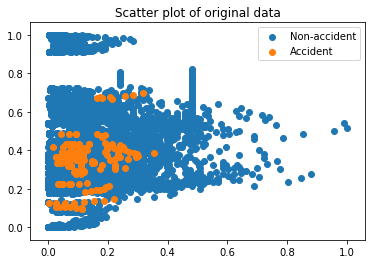

In [3]:
#Change data structure (X,1) to (X,)
y=np.squeeze(y)
# print(y.shape); print(y)
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.title("Scatter plot of original data")
plt.legend(['Non-accident', 'Accident'])
plt.show()

In [ ]:
# transform the dataset (upsampling)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [4]:
# transform the dataset (up+down sampling)
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X, y = pipeline.fit_resample(X, y)

Counter({0.0: 1252, 1.0: 626})


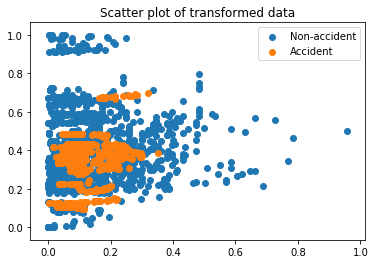

In [5]:
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label after oversample
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.title("Scatter plot of transformed data")
plt.legend(['Non-accident', 'Accident'])
plt.show()

In [6]:
#Add extra dimention to y
y=np.expand_dims(y, axis=1)
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify= y, random_state=10)

print(X_train.shape); print(X_test.shape)
print(y_train.shape); print(y_test.shape)

(1314, 45)
(564, 45)
(1314, 1)
(564, 1)


Text(0.5, 1.0, 'The loss curve for MLP classifier')

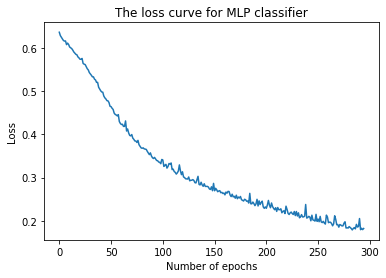

In [7]:
#FNN model analysis

t1=time.time()
final_model = MLPClassifier(activation='tanh', solver='adam', alpha=0.001, batch_size=64, 
                            max_iter=500, hidden_layer_sizes=(18, 20), random_state=10)


# Training perceptron
t2=time.time()
final_model.fit(X_train, y_train.ravel())
t3=time.time()
y_pred = final_model.predict(X_test)
# Making predictions on validation data (int: 0, 1) with 0 as break point
t4=time.time()

#Loss curve
plt.plot(final_model.loss_curve_)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('The loss curve for MLP classifier')

In [8]:
## Classification Report
# print("Validation accuracy: %.2f%% \n" % (results_kfold.mean()*100.0))

print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Training set score: %f" % final_model.score(X_train, y_train))
print("Test set score: %f \n" % final_model.score(X_test, y_test))

print("F1 Score: %f \n" % f1_score(y_test, y_pred, average= 'macro'))

print(classification_report(y_test, y_pred), "\n")

print("Classification time:",str(t4-t2)," seconds")
print("Training time:",str(t3-t2)," seconds\n")
print("Testing time:",str(t4-t3)," seconds\n")

Accuracy: 0.90
Training set score: 0.910198
Test set score: 0.898936 

F1 Score: 0.891570 

              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92       376
         1.0       0.79      0.96      0.86       188

    accuracy                           0.90       564
   macro avg       0.88      0.91      0.89       564
weighted avg       0.91      0.90      0.90       564
 

Classification time: 2.264003276824951  seconds
Training time: 2.2600326538085938  seconds

Testing time: 0.003970623016357422  seconds



Confusion matrix (transformed data)
[[327  49]
 [  8 180]]


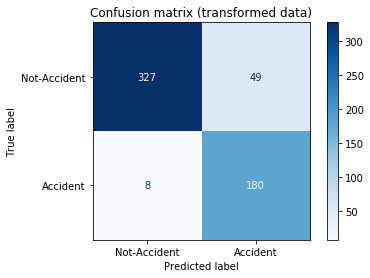

In [9]:
#Confusion matrix
# Plot non-normalized confusion matrix
title = (f"Confusion matrix (transformed data)")
disp = plot_confusion_matrix(final_model, X_test, y_test, cmap=plt.cm.Blues,
                             display_labels= ('Not-Accident', 'Accident'),
                             sample_weight=None, normalize=None)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

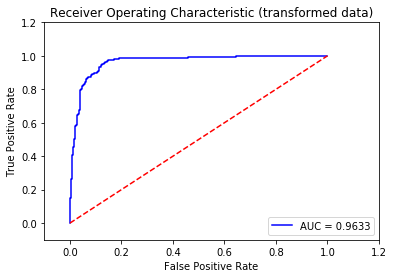

In [10]:
# ROC-AUC
fpr3, tpr3, threshold = roc_curve(y_test, final_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr3, tpr3)
plt.title(f"Receiver Operating Characteristic (transformed data)")
plt.plot(fpr3, tpr3, 'b',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [11]:
#Write to .csv
z=np.squeeze(y)
new_dataset=np.hstack((X,y))
print(X.shape); print(X)
print(z.shape); print(z)
print(new_dataset.shape)
np.savetxt("dataset_norm_t8_p8_45f_td.csv", new_dataset, delimiter=",")

(1878, 45)
[[0.23275862 0.31550934 0.31098508 ... 0.18897638 0.01268499 0.15516811]
 [0.5862069  0.33720476 0.33900778 ... 0.18897638 0.72610994 0.07095531]
 [0.03017241 0.24037085 0.24094641 ... 0.19685039 0.897463   0.01007288]
 ...
 [0.09913147 0.34516517 0.34493419 ... 0.37211507 0.69301336 0.06447275]
 [0.21890455 0.30703235 0.30696738 ... 0.16822239 0.01716359 0.20217726]
 [0.06822505 0.36493995 0.36580144 ... 0.2992126  0.54085582 0.16203262]]
(1878,)
[0. 0. 0. ... 1. 1. 1.]
(1878, 46)
